In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sympy as spy
from IPython.display import display, Image
spy.init_printing()

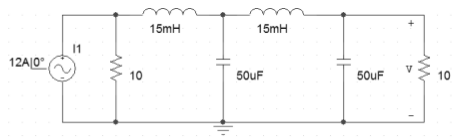

In [2]:
Image("Circuit.png")

Using a Thevenin equivalent, and taking the currents from left to right in clockwise direction:

$$120 V = \mathbb{Z}_R\mathbb{I}_1 + \mathbb{Z}_L\mathbb{I}_1 + \mathbb{Z}_C(\mathbb{I}_1 - \mathbb{I}_2)$$

$$ 0 = \mathbb{Z}_C(\mathbb{I}_2 -\mathbb{I}_1) + \mathbb{Z}_L\mathbb{I}_2 + \mathbb{Z}_C(\mathbb{I}_2-\mathbb{I}_3)$$

$$ 0 = \mathbb{Z}_C(\mathbb{I}_3 - \mathbb{I}_2) + \mathbb{Z}_R\mathbb{I}_3 $$

Where $\mathbb{Z}_C = 1/(j\omega c)$, $\mathbb{Z}_L=j\omega L$ and $\mathbb{Z}_R = R$

In [3]:
c = spy.symbols('c')#50e-6
L = spy.symbols('L')#15e-3
R = spy.symbols('R')#10
omega = spy.symbols(r'\omega')
Z_c = 1/(1j*omega*c)
Z_L = 1j*omega*L
Z_R = R
I_1 = spy.symbols('I_1')
I_2 = spy.symbols('I_2')
I_3 = spy.symbols('I_3')

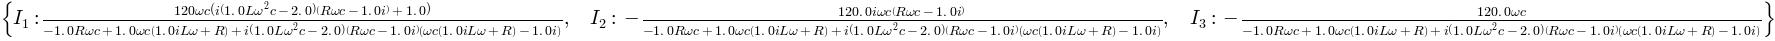

In [4]:
system = spy.Matrix(((Z_R+Z_L+Z_c, Z_c, 0, 120), (-Z_c, 2*Z_c+Z_L, -Z_c, 0), (0, -Z_c, Z_c+Z_R, 0)))
solution = spy.solve_linear_system(system, I_1, I_2, I_3)
display(solution)

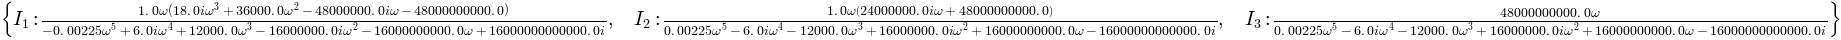

In [5]:
c = 50e-6
L = 15e-3
R = 10
Z_c = 1/(1j*omega*c)
Z_L = 1j*omega*L
Z_R = R

system = spy.Matrix(((Z_R+Z_L+Z_c, Z_c, 0, 120), (-Z_c, 2*Z_c+Z_L, -Z_c, 0), (0, -Z_c, Z_c+Z_R, 0)))
solution = spy.solve_linear_system(system, I_1, I_2, I_3)
display(solution)

number = 1000
phases = np.zeros(number)
amplitudes = np.zeros(number)
frecuencies = np.logspace(0, 6, number)
for (i, frecuency) in enumerate(frecuencies):
    current = solution[I_3].evalf(subs = {omega:frecuency})
    voltage = current*R
    
    imaginary = float(spy.im(voltage))
    real = float(spy.re(voltage))
    
    phase = imaginary/real
    phases[i] = np.arctan(phase)
    
    amplitudes[i] = abs(voltage)

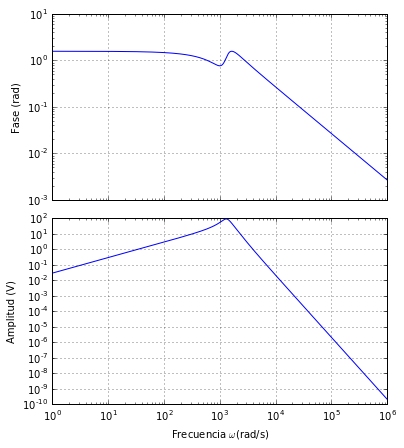

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 7))
ax1.loglog(frecuencies, phases)
ax1.set_ylabel("Fase (rad)")
ax1.grid(True)

ax2.loglog(frecuencies, amplitudes)
ax2.set_xlabel("Frecuencia $\omega$(rad/s)")
ax2.set_ylabel("Amplitud (V)")
ax2.grid(True)
fig.subplots_adjust(hspace=0.1)
#fig.savefig('Circuit.png')